# AI Generated Indian Classical Music  

By: Arjun Shankar

This notebook presents a preliminary data exploration and analysis of the SARAGA open source dataset of Indian Classical Music.

South Indian Classical Music (Carnatic) and North Indian Classical Music (Hindustani) both share the concept of Ragas or melodic frameworks. The eventual goal is to develop a Raga classifier and generative model of Indian Classical Music.

## 1. Data Import and Organization

Import Libraries

In [1]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms

Define path to data

In [2]:
path_to_hindustani=os.path.join('..', 'saraga1.0', 'hindustani')
path_to_carnatic=os.path.join('..', 'saraga1.0', 'carnatic')

Calculate the Number of Music Files in each Genre

In [3]:
# Subtract 1 because of .DS_store File
num_hindustani=len(os.listdir(path_to_hindustani))-1
num_carnatic=len(os.listdir(path_to_carnatic))-1

Read and store Hindustani song and annotation files

In [4]:
#Define Pandas DataFrame to store information
data_hindustani = pd.DataFrame(columns=['title','raag_id', 'raag_name','laya_id','laya_name','taal_id','taal_name','length','time','pitch','ctonic'])

for n in range(0,num_hindustani):
    print(n)
    # Define the path to the song
    path_to_song = os.path.join(path_to_hindustani, str(n))
    
    # Retrieve the pitches and the ctonic for the song
    pitches=[file for file in os.listdir(path_to_song) if file.endswith('pitch.txt')]
    ctonics=[file for file in os.listdir(path_to_song) if file.endswith('ctonic.txt')]
    pitch=np.loadtxt(os.path.join(path_to_song,pitches[0]))
    time=pitch[:,0]
    pitch=pitch[:,1]
    ctonic=np.loadtxt(os.path.join(path_to_song,ctonics[0]))
     
    # Open the JSON file for the song
    json_files = [file for file in os.listdir(path_to_song) if file.endswith('.json')]
    with open(os.path.join(path_to_song, json_files[0])) as json_file:
        json_text = json.load(json_file)
    
    title=json_text['title']
    length=json_text['length']
    
    if len(json_text['layas']) !=0:
        layas=json_text['layas'][0]['name']
        laya_id=json_text['layas'][0]['uuid']
    else:
        layas='NaN'
        laya_id='NaN'
    
    if len(json_text['taals']) !=0:
        taals=json_text['taals'][0]['name']
        taal_id=json_text['taals'][0]['uuid']
    else:
        taals='NaN'
        taal_id='NaN'
    
    if len(json_text['raags']) !=0:
        raag_id = json_text['raags'][0]['uuid']
        raag_name = json_text['raags'][0]['common_name']
        
    else:
        raag_id='NaN'
        raag_name='NaN'

    
    data_hindustani.loc[n] = [title, raag_id, raag_name, laya_id,layas, taal_id, taals, length, time, pitch, ctonic,]
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107


Read and store Carnatic song and annotation files

In [5]:
#Define Pandas DataFrame to store information
data_carnatic = pd.DataFrame(columns=['title','raag_id', 'raag_name','taal_id','taal_name','length','time','pitch','ctonic'])

for n in range(0,num_carnatic):
    print(n)
    # Define the path to the song
    path_to_song = os.path.join(path_to_carnatic, str(n))
    
    # Retrieve the pitches and the ctonic for the song
    pitches=[file for file in os.listdir(path_to_song) if file.endswith('pitch.txt')]
    ctonics=[file for file in os.listdir(path_to_song) if file.endswith('ctonic.txt')]
    pitch=np.loadtxt(os.path.join(path_to_song,pitches[0]))
    time=pitch[:,0]
    pitch=pitch[:,1]
    ctonic=np.loadtxt(os.path.join(path_to_song,ctonics[0]))
     
    # Open the JSON file for the song
    json_files = [file for file in os.listdir(path_to_song) if file.endswith('.json')]
    with open(os.path.join(path_to_song, json_files[0])) as json_file:
        json_text = json.load(json_file)
    
    title=json_text['title']
    length=json_text['length']
    
    if len(json_text['taala']) !=0:
        taals=json_text['taala'][0]['name']
        taal_id=json_text['taala'][0]['uuid']
    else:
        taals='NaN'
        taal_id='NaN'
    
    if len(json_text['raaga']) !=0:
        raag_id = json_text['raaga'][0]['uuid']
        raag_name = json_text['raaga'][0]['name']
        
    else:
        raag_id='NaN'
        raag_name='NaN'

    
    data_carnatic.loc[n] = [title, raag_id, raag_name, taal_id, taals, length, time, pitch, ctonic,]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196


Print out Pandas DataFrames to visualize Data pulled from JSONS

In [6]:
print('Unique Carnatic Ragas (Classes): ',len(data_carnatic.raag_id.unique()))
print('Total Carnatic Recordings: ', len(data_carnatic.raag_id))
data_carnatic.head()

Unique Carnatic Ragas (Classes):  97
Total Carnatic Recordings:  197


,title,raag_id,raag_name,taal_id,taal_name,length,time,pitch,ctonic
0,Varashiki Vahana,NaN,NaN,c788c38a-b53a-48cb-b7bf-d11769260c4d,Ādi,545000,"[0.0, 0.0044444, 0.0088889, 0.0133333, 0.01777...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",135.425885
1,Bhuvini Dasudane,42dd0ccb-f92a-4622-ae5d-a3be571b4939,Śrīranjani,c788c38a-b53a-48cb-b7bf-d11769260c4d,Ādi,309000,"[0.0, 0.0044444, 0.0088889, 0.0133333, 0.01777...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",201.74089
2,Velum Mayilume,6e64197a-87d1-4258-b114-d219cb1230cd,Sucaritra,8c6c26db-e01a-4eef-ae0b-9f7e31a926e8,Rūpaka,734000,"[0.0, 0.0044444, 0.0088889, 0.0133333, 0.01777...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",135.425885
3,Karuna Nidhi Illalo,a9413dff-91d1-4e29-ad92-c04019dce5b8,Tōḍi,c788c38a-b53a-48cb-b7bf-d11769260c4d,Ādi,1642000,"[0.0, 0.0044444, 0.0088889, 0.0133333, 0.01777...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",135.425885
4,Tulasi Bilva,df85a0a5-b1a8-42f1-a87b-3d7c7ee33fb4,Kēdāragauḷa,c788c38a-b53a-48cb-b7bf-d11769260c4d,Ādi,590000,"[0.0, 0.0044444, 0.0088889, 0.0133333, 0.01777...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",135.425885


In [7]:
print('Unique Hindustani Ragas (Classes): ',len(data_hindustani.raag_id.unique()))
print('Total Hindustani Recordings: ', len(data_hindustani.raag_id))
data_hindustani.head()

Unique Hindustani Ragas (Classes):  62
Total Hindustani Recordings:  108


,title,raag_id,raag_name,laya_id,laya_name,taal_id,taal_name,length,time,pitch,ctonic
0,Shrutinandan Concept - an Introduction by Pand...,NaN,NaN,NaN,NaN,NaN,NaN,389199,"[0.0, 0.0044444, 0.0088889, 0.0133333, 0.01777...","[1077.1859131, 1052.5826416, 987.7832642, 982....",138.591315
1,Bairagi,b143adaa-f1a6-4de4-8985-a5bd35e96279,Bairagi,ee58d24a-60aa-4b16-bfcf-edd105118738,Vilaṁbit,7cb20903-5f64-4f15-8713-2fb4fcca2b5b,ēktāl,899469,"[0.0, 0.0044444, 0.0088889, 0.0133333, 0.01777...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",138.591315
2,Bilaskhani Todi,dd59147d-8775-44ff-a36b-0d9f15b31319,Bilaskhani todi,ee58d24a-60aa-4b16-bfcf-edd105118738,Vilaṁbit,1ec9a7ab-8575-4cbe-b775-fac17e633f35,Tīntāl,854500,"[0.0, 0.0044444, 0.0088889, 0.0133333, 0.01777...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",138.591315
3,Nat Bhairon,9571385f-2743-41a1-9c6d-3db0545a6773,Nat bhairav,ee58d24a-60aa-4b16-bfcf-edd105118738,Vilaṁbit,7cb20903-5f64-4f15-8713-2fb4fcca2b5b,ēktāl,638360,"[0.0, 0.0044444, 0.0088889, 0.0133333, 0.01777...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",138.591315
4,Aahir Bhairon,f6432fec-e9c2-4b09-9e73-c46086cbd8ea,Ahir bhairav,c1673b5e-09d8-412f-9256-6c7271e968fa,Madhya,74c68999-a018-427b-973d-11bf49b6bd71,Jhaptāl,589443,"[0.0, 0.0044444, 0.0088889, 0.0133333, 0.01777...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",138.591315


## 2. Analysis of Song Data

## Decoding Characteristic Patterns of Raag Improvisation

Both Hindustani and Carnatic music traditions place a heavy emphasis on improvisation. Fixed compositions only take up a small portion of the performance time. The rest is filled with improvisation in the raag (mode) in which the composition is based. Among the western music traditions, Jazz music is the most similar to Indian Art Music as it too places a heavy emphasis on improvisation. 

Due to the improvisational nature of Indian Music, the same composition performed by two different artists may be performed for different lengths of time and may be explored in very different ways. Despite the high variability,  with a large dataset of Indian music, it may be possible to determine certain characteristic patterns that performances follow. In the following section, I determine characteristic patterns that hold across all song clips.

### Figure 1: Pitch Patterns alone Distinguish Songs from Other Audio 

Here the top two plots show pitch vectors of audio files that are not songs. They are teaching clips in which Pt. Ajoy Chakraborthy explains the lyrics of songs and some rythmic patterns in Hindustani Music. Though these files have musical content (a tonic drone in the background and some tabla playing), they are not coherent performances of one song. The bottom two plots show songs. 

Visually, it appears that songs generally follow this trend: low pitch --> high pitch ->  mid-pitch -> high pitch
In other words, artists start out at a low pitch, explore the entire pitch range of a raga including the highest points, then improvise in mid pitch range, and end high.

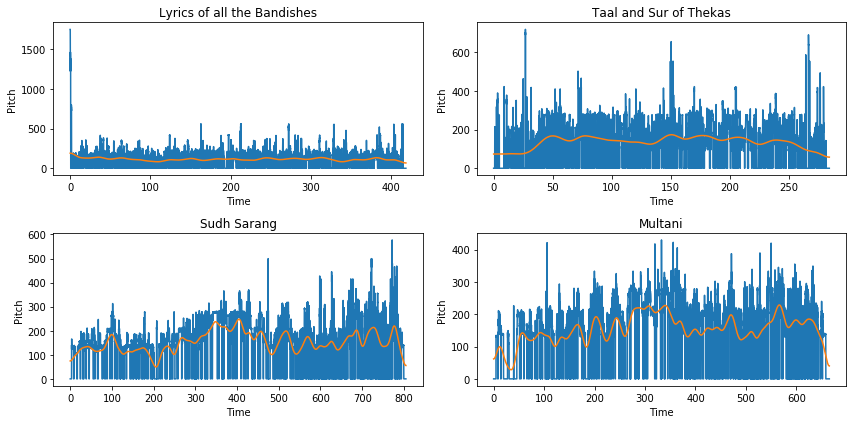

In [48]:
from scipy.ndimage import gaussian_filter

f=plt.figure(figsize=(12,6))

for i, n in enumerate(range(6,10)):
    plt.subplot(2,2,i+1)
    y=data_hindustani['pitch'][n][:]
    plt.plot(data_hindustani['time'][n][:],data_hindustani['pitch'][n][:])
    plt.plot(data_hindustani['time'][n][:],gaussian_filter(y, sigma=1500))
    plt.ylabel('Pitch')
    plt.xlabel('Time')
    plt.title(data_hindustani['title'][n])
plt.tight_layout()

## Figure 2: Extraction of Melody

Here I display how the melody will be extracted from the audio files for training the neural network. Instead of plotting to the 

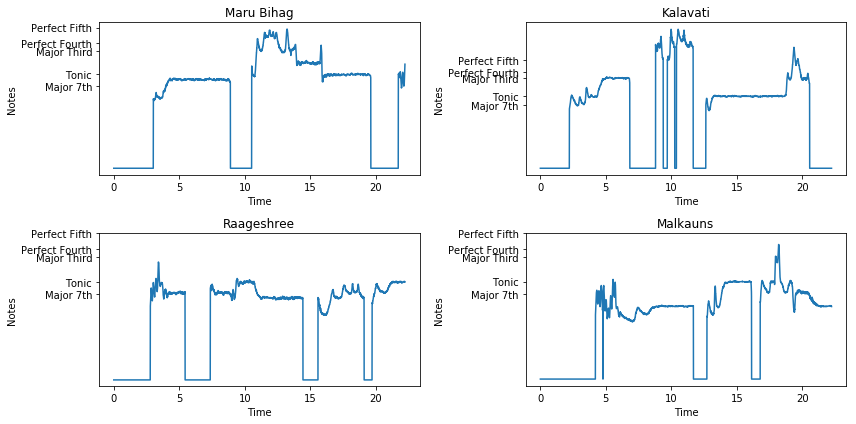

In [61]:
f=plt.figure(figsize=(12,6))
start=1
end=5000

for i, n in enumerate(range(11,15)):
    plt.subplot(2,2,i+1)
    plt.plot(data_hindustani['time'][n][start:end],data_hindustani['pitch'][n][start:end]/data_hindustani['ctonic'][n])
    plt.ylabel('Notes')
    plt.xlabel('Time')
    plt.title(data_hindustani['title'][n])
    plt.yticks([15/8-1,1/1,5/4,4/3,3/2], ['Major 7th','Tonic','Major Third','Perfect Fourth','Perfect Fifth'])
plt.tight_layout()